In [23]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv('./전국연도별방문자회계정보진짜최종.csv')
df.columns

Index(['축제명', '개최년도', '축체기간(일)', '(현지인)방문자수', '(외지인)방문자수', '(외국인)방문자수',
       '(전체)방문자수', '일평균 방문자수', '전년도 일평균 방문자수', '일평균 방문자수 증감률', '(이전)전체방문자',
       '(전체)방문자증감', '(현지인)방문자비율', '(외지인)방문자비율', '(외국인)방문자비율', '전년대비방문자증감비율',
       '도', '시군구', '회계연도', '지역명', '행사축제명', '총비용', '사업수익', '순원가', '시작월', '종료월',
       'index'],
      dtype='object')

In [25]:
df_year = (
    df.loc[df['개최년도'].between(2018, 2023), ['개최년도', '(전체)방문자수', '총비용']]
    .groupby('개최년도').sum())
df_year

,(전체)방문자수,총비용
개최년도,,
2018,13671214.0,8.636775e+10
2019,13945717.0,8.478721e+10
2022,16701817.0,7.725089e+10
2023,17024718.0,1.057114e+11


In [33]:
df

,축제명,개최년도,축체기간(일),(현지인)방문자수,(외지인)방문자수,(외국인)방문자수,(전체)방문자수,일평균 방문자수,전년도 일평균 방문자수,일평균 방문자수 증감률,...,시군구,회계연도,지역명,행사축제명,총비용,사업수익,순원가,시작월,종료월,index
0,강경젓갈축제,2018,5,50642.0,59291.0,108.0,110041.0,22008.2000,NaN,NaN,...,논산시,2018.0,충남,강경젓갈축제,8.250000e+08,183950000.0,6.410500e+08,10.0,10.0,강경젓갈축제2018
1,강경젓갈축제,2022,5,57971.0,69910.0,19.0,127900.0,25580.0000,22008.2000,16.2,...,논산시,2022.0,충남,강경젓갈축제,1.003000e+09,0.0,1.003000e+09,10.0,10.0,강경젓갈축제2022
2,강경젓갈축제,2023,4,52282.0,71999.0,18.0,124299.0,31074.7500,25580.0000,21.5,...,논산시,2023.0,충남,강경젓갈축제,1.178086e+09,0.0,1.178086e+09,10.0,10.0,강경젓갈축제2023
3,강릉커피축제,2018,5,61368.0,82621.0,279.0,144268.0,28853.6000,NaN,NaN,...,강릉시,2018.0,강원,강릉커피축제,3.904450e+08,40000000.0,3.504450e+08,10.0,10.0,강릉커피축제2018
4,강릉커피축제,2019,4,98907.0,61246.0,743.0,160896.0,40224.0000,28853.6000,39.4,...,강릉시,2019.0,강원,강릉커피축제,4.400000e+08,91000000.0,3.490000e+08,10.0,10.0,강릉커피축제2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,화천산천어축제,2023,23,215883.0,289568.0,312.0,505763.0,21989.6957,20867.0435,5.4,...,화천군,2023.0,강원,얼음나라화천 산천어축제,3.261309e+09,0.0,3.261309e+09,1.0,1.0,화천산천어축제2023
315,횡성한우축제,2018,5,74833.0,102837.0,175.0,177845.0,35569.0000,NaN,NaN,...,횡성군,2018.0,강원,횡성한우축제,2.029171e+09,40000000.0,1.989171e+09,10.0,10.0,횡성한우축제2018
316,횡성한우축제,2019,5,69440.0,103929.0,1748.0,175117.0,35023.4000,35569.0000,-1.5,...,횡성군,2019.0,강원,횡성한우축제,2.134684e+09,0.0,2.134684e+09,10.0,10.0,횡성한우축제2019
317,횡성한우축제,2022,5,92932.0,105690.0,16.0,198638.0,39727.6000,35023.4000,13.4,...,횡성군,2020.0,강원,횡성한우축제,1.213455e+09,141440.0,1.213314e+09,10.0,10.0,횡성한우축제2022


In [30]:
ax

,year,month,name,visitors,cost,visit/cost,visit/cost_normalized
0,2018,10.0,강경젓갈축제,110041.0,8.250000e+08,-8.922286,0.207377
1,2022,10.0,강경젓갈축제,127900.0,1.003000e+09,-8.967257,0.202684
2,2023,10.0,강경젓갈축제,124299.0,1.178086e+09,-9.156712,0.182917
3,2018,10.0,강릉커피축제,144268.0,3.904450e+08,-7.903370,0.313691
4,2019,10.0,강릉커피축제,160896.0,4.400000e+08,-7.913772,0.312605
...,...,...,...,...,...,...,...
314,2023,1.0,화천산천어축제,505763.0,3.261309e+09,-8.771571,0.223102
315,2018,10.0,횡성한우축제,177845.0,2.029171e+09,-9.342226,0.163560
316,2019,10.0,횡성한우축제,175117.0,2.134684e+09,-9.408375,0.156658
317,2022,10.0,횡성한우축제,198638.0,1.213455e+09,-8.717498,0.228744


C:\Users\zhdwj\AppData\Local\Temp\ipykernel_21248\1036007483.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax_mean = ax_num.groupby('year_month').mean().reset_index()


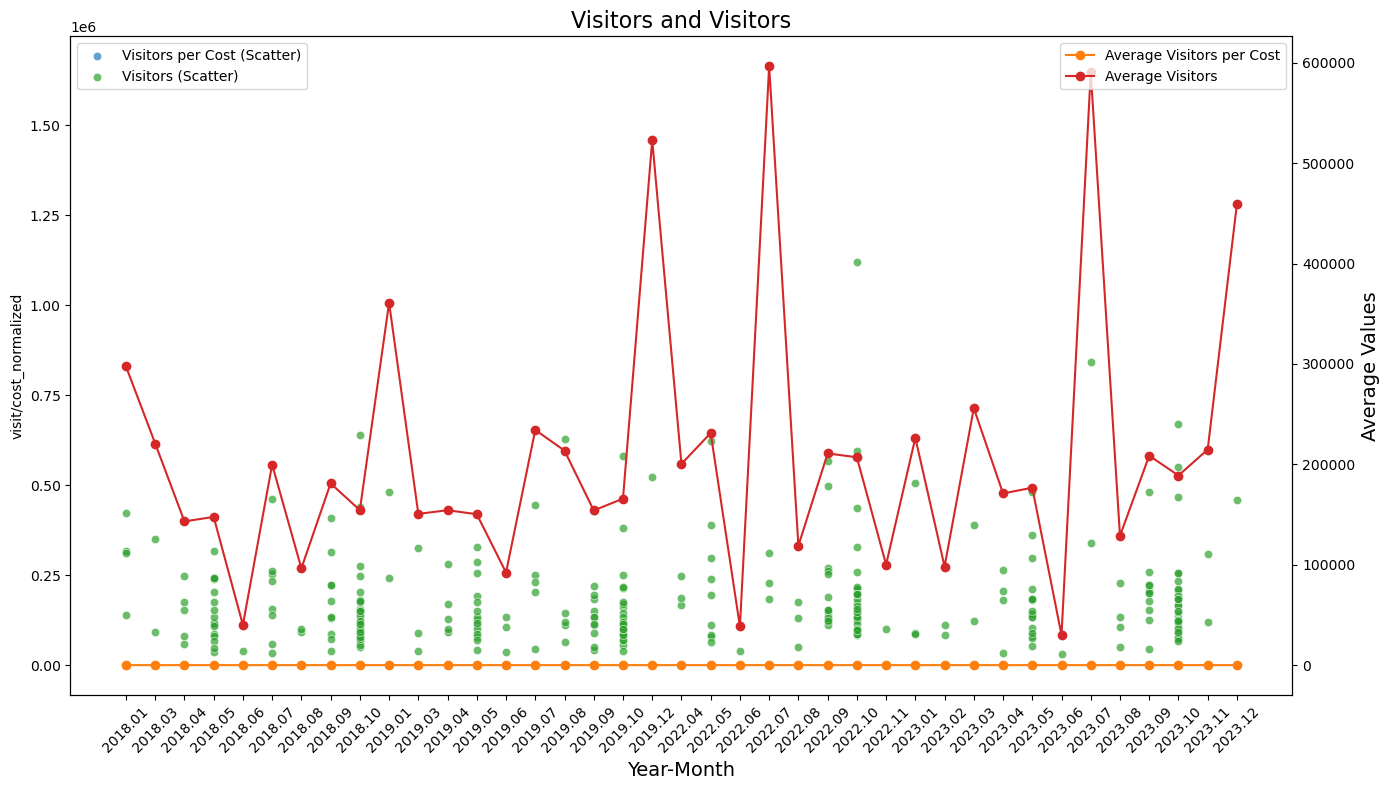

In [ ]:
from sklearn.preprocessing import MinMaxScaler

ax = df[['개최년도', '시작월', '축제명', '(전체)방문자수', '총비용']].copy()
ax.columns = ['year', 'month', 'name', 'visitors', 'cost']
ax['visit/cost'] = np.where(ax['cost'] == 0, np.nan, ax['visitors'] / ax['cost'])       #비용 대비 방문객 항 추가.
ax = ax.dropna(subset = ['month'])


ax['visit/cost'] = np.log(ax['visit/cost'])                                             #값이 너무 튀어서 로그처리.

mms = MinMaxScaler()
ax['visit/cost_normalized'] = mms.fit_transform(ax[['visit/cost']])              


ax['month'] = ax['month'].astype(int)                                               #자꾸 마지막에 . 들어가서 int로 변경
ax['year_month'] = pd.to_datetime(ax['year'].astype(str) + '-' + ax['month'].astype(str).str.zfill(2))

ax['year_month'] = pd.Categorical(
    ax['year_month'].dt.strftime('%Y.%m'),  
    categories=ax['year_month'].dt.strftime('%Y.%m').sort_values().unique(),
    ordered=True)


ax_num = ax[['year_month', 'visitors', 'visit/cost_normalized']]                #년간 비교를 위해서 groupby 하려 했는데 object라 안나와서 좀 조정.

ax_mean = ax_num.groupby('year_month').mean().reset_index()

fig, ax1 = plt.subplots(figsize=(14, 8))

sns.scatterplot(
    data=ax,
    x='year_month',
    y='visit/cost_normalized',
    color='tab:blue',  
    alpha=0.7,
    label='Visitors per Cost (Scatter)',
    ax=ax1)

sns.scatterplot(
    data=ax,
    x='year_month',
    y='visitors',
    color='tab:green', 
    alpha=0.7,
    label='Visitors (Scatter)',
    ax=ax1)

ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()

ax2.plot(
    ax_mean['year_month'],
    ax_mean['visit/cost_normalized'],
    color='tab:orange',
    marker='o',
    label='Average Visitors per Cost')

ax2.plot(
    ax_mean['year_month'],
    ax_mean['visitors'],
    color='tab:red',
    marker='o',
    label='Average Visitors')

ax2.set_ylabel('Average Values', fontsize=14)
ax2.tick_params(axis='y', labelcolor='black')

ax1.set_xlabel('Year-Month', fontsize=14)
ax1.set_xticks(range(len(ax_mean['year_month'])))
ax1.set_xticklabels(ax_mean['year_month'], rotation=45)

plt.title('Visitors and Visitors', fontsize=16)

ax1.legend(loc='upper left', fontsize=10)
ax2.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()


 개같이 실패해서 분할해서 표기하기로 목표 변경.

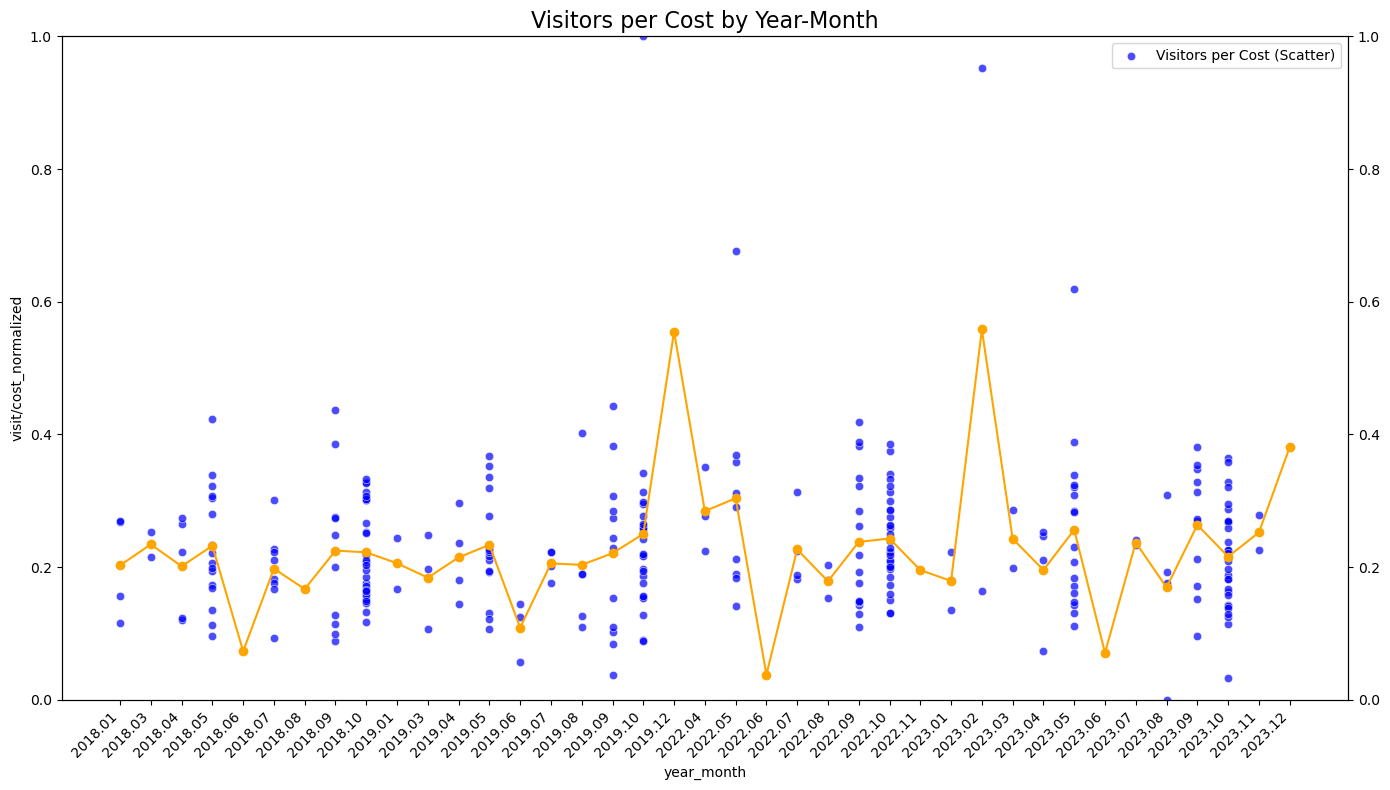

In [ ]:
fig, ax1 = plt.subplots(figsize=(14, 8))

sns.scatterplot(
    data=ax,
    x='year_month',
    y='visit/cost_normalized',
    color='blue',
    alpha=0.7,
    label='Visitors per Cost (Scatter)',
       ax=ax1)

ax2 = ax1.twinx()

ax2.plot(
    ax_mean['year_month'],
    ax_mean['visit/cost_normalized'],
    color='orange',
    marker='o',
    label='Average Visitors per Cost')

y_min = min(ax['visit/cost_normalized'].min(), ax_mean['visit/cost_normalized'].min())
y_max = max(ax['visit/cost_normalized'].max(), ax_mean['visit/cost_normalized'].max())
ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)

ax1.set_xticks(range(len(ax_mean['year_month'])))
ax1.set_xticklabels(ax_mean['year_month'], rotation=45, ha='right', fontsize=10)

plt.title('Visitors per Cost', fontsize=16)

plt.tight_layout()
plt.show()


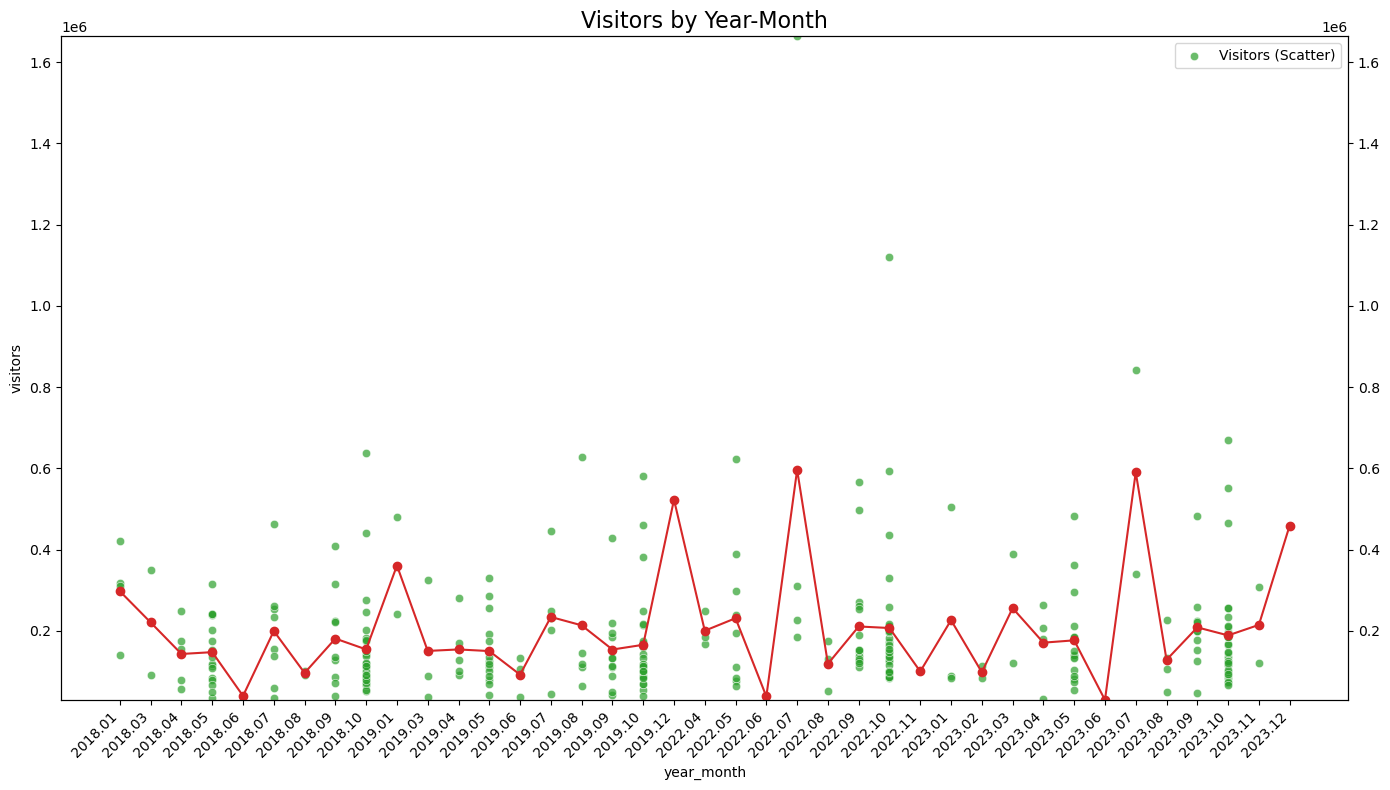

In [56]:
fig, ax1 = plt.subplots(figsize=(14, 8))

# 첫 번째 y축: Scatter Plot
sns.scatterplot(
    data=ax,
    x='year_month',
    y='visitors',
    color='tab:green', 
    alpha=0.7,
    label='Visitors (Scatter)',
    ax=ax1)

# 두 번째 y축 생성
ax2 = ax1.twinx()

# 두 번째 y축: Line Plot
ax2.plot(
    ax_mean['year_month'],
    ax_mean['visitors'],
    color='tab:red',
    marker='o',
    label='Average Visitors')

# y축 범위를 동일하게 설정
y_min = min(ax['visitors'].min(), ax_mean['visitors'].min())
y_max = max(ax['visitors'].max(), ax_mean['visitors'].max())
ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)

# x축 설정
ax1.set_xticks(range(len(ax_mean['year_month'])))
ax1.set_xticklabels(ax_mean['year_month'], rotation=45, ha='right', fontsize=10)

# 그래프 제목 설정
plt.title('Visitors by Year-Month', fontsize=16)

# 레이아웃 조정
plt.tight_layout()
plt.show()

In [ ]:
print((ax['cost'] == 0).sum())
print(ax.shape[0])
print(outliers)

NameError: name 'ax' is not defined

In [ ]:
ax_num = ax[['year_month', 'visitors', 'visit/cost_normalized']]
ax_num.groupby('year_month').mean()


In [ ]:
from sklearn.preprocessing import MinMaxScaler


ax = df[['개최년도', '시작월', '축제명', '(전체)방문자수', '총비용']].copy()
ax.columns = ['year', 'month', 'name', 'visitors', 'cost']
ax['visit/cost'] = np.where(ax['cost'] == 0, np.nan, ax['visitors'] / ax['cost'])       #비용 대비 방문객 항 추가.


scaler = MinMaxScaler()
ax['visit/cost_normalized'] = scaler.fit_transform(ax[['visit/cost']])
outliers = ax[ax['visit/cost_normalized'] > 0.01]            # 그래프가 너무 이상하게 나와서 보니까. 점 두개가 너무 기이할 정도로 높게 형성되서 제대로 된 측정이 안됨.
ax = ax[ax['visit/cost_normalized'] <= 0.01]
ax['visit/cost_normalized'] = scaler.fit_transform(ax[['visit/cost']])          # outlier 날리고 재 정규화.


ax['month'] = ax['month'].astype(int)
ax['year_month'] = pd.to_datetime(ax['year'].astype(str) + '-' + ax['month'].astype(str).str.zfill(2))

ax['year_month'] = pd.Categorical(
    ax['year_month'].dt.strftime('%Y.%m'),  
    categories=ax['year_month'].dt.strftime('%Y.%m').sort_values().unique(),
    ordered=True)

ax_num = ax[['year_month', 'visitors', 'visit/cost_normalized']]
ax_num.groupby('year_month').mean()


plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=ax,
    x='year_month',
    y='visit/cost_normalized',
    alpha=0.7)

plt.title('Visitors per Cost by Year and Month', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Normalized Visitors per Cost', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()
